In [68]:
import random 

# Implementación directa de un perceptrón simple 

def perceptron(x,w,b):
    z = 0
    for i in range(len(x)):
        z += x[i]*w[i]
    z += b
    return 1 if z > 0 else 0

def mostrar_resultados(X,y,w,b):
    print(f"Resultados para {w=}, {b=}")
    for xi, yi in zip(X,y):
        yp = perceptron(xi, w, b)
        print(xi, yp, '😄' if yp == yi else '😡')

# Datos de entrenamientos para la compuerta lógica AND
X = [[0,0], [0,1], [1,0], [1,1]]

y = [0, 0, 0, 1] # and
w = [0, 0]; b = 0 # Inicialización de los pesos y el sesgo 
mostrar_resultados(X,y,w,b)

w = [1, 1]; b = -1.5 # parametros que hacen que el perceptron funcione para AND
mostrar_resultados(X, y, w, b)

y = [0, 1, 1, 1] # or
w = [1, 1]; b = -0.5 # parametros que hacen que el perceptron funcione para OR
mostrar_resultados(X, y, w, b)

Resultados para w=[0, 0], b=0
[0, 0] 0 😄
[0, 1] 0 😄
[1, 0] 0 😄
[1, 1] 0 😡
Resultados para w=[1, 1], b=-1.5
[0, 0] 0 😄
[0, 1] 0 😄
[1, 0] 0 😄
[1, 1] 1 😄
Resultados para w=[1, 1], b=-0.5
[0, 0] 0 😄
[0, 1] 1 😄
[1, 0] 1 😄
[1, 1] 1 😄


In [ ]:

w=[0,0]; b=0
lr = 0.1
for _ in range(15):
    print(f"{w=}, {b=}")

    for xi, yi in zip(X,y):
        yp = perceptron(xi, w, b)
        error = yi - yp
        for j in range(len(w)):
            w[j] += lr * error * xi[j]
        b += lr * error
        print(xi, yi, yp)

    print('---')


In [31]:
import numpy as np 
import random
class Perceptron:
    def __init__(self, aprendizaje=0.001, epocas=1000):
        self.aprendizaje = aprendizaje
        self.epocas = epocas
        self.w = None
        self.b = None   
        self.errores = []

    def perceptron(self, x):
        return np.dot(x, self.w) + self.b

    def activacion(self, z): # Escalón unitario
        return 0 if z <= 0 else 1

    def error(self, y, y_pred):
        return ((y - y_pred)**2).mean()
    
    def ajustar(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.w = np.random.rand(X.shape[1])
        self.b = random.random()

        for _ in range(self.epocas):
            # Ajustamos los parámetros de todas las muestras en forma simultánea

            # Forward propagation - Propagación hacia adelante
            y_pred = np.array([self.predecir(x) for x in X])
            error  = y - y_pred

            # Backpropagation - Retropropagación 
            self.w += self.aprendizaje * np.dot(error, X)
            self.b += self.aprendizaje * error.sum()

            self.errores.append(self.error(y, y_pred))
        return self 

    def predecir(self, x):
        return self.activacion(self.perceptron(x))

class PerceptronRegresion(Perceptron):
    def activacion(self, z):
        return z


In [25]:
import pandas as pd 
def cargar(tipo='Iris-setosa'):
    datos = pd.read_csv('iris.csv')
    X = datos.iloc[:, 0:4].values
    tipos = datos.iloc[:, 4].values
    y = np.where(tipos == tipo, 1, 0)
    return X, y 

X, y = cargar('Iris-setosa')
p = Perceptron()
p.ajustar(X,y)

X, y = cargar('Iris-versicolor')
p2 = Perceptron()
p2.ajustar(X,y)

def mostrar():
    for n in [1, 20,40,60,90,120]:
        e1 = X[n]
        s1 = y[n]
        print(f"1 {n:3} prediccion:{p.predecir(e1)} real:{s1}")
        print(f"2 {n:3} prediccion:{p2.predecir(e1)} real:{s1}")

mostrar()

1   1 prediccion:1 real:0
2   1 prediccion:1 real:0
1  20 prediccion:1 real:0
2  20 prediccion:1 real:0
1  40 prediccion:1 real:0
2  40 prediccion:0 real:0
1  60 prediccion:0 real:1
2  60 prediccion:1 real:1
1  90 prediccion:0 real:1
2  90 prediccion:1 real:1
1 120 prediccion:0 real:0
2 120 prediccion:1 real:0


Si hace 30 grados, venderemos [643.80493379] helados


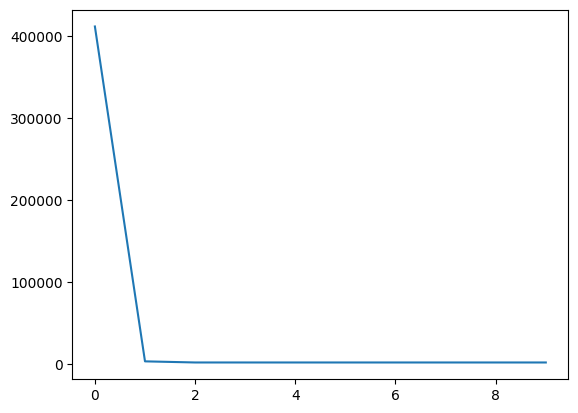

In [59]:
import matplotlib.pyplot as plt

datos = pd.read_csv('helados.csv')
X = datos.iloc[:,0:1].values
y = datos.iloc[:,1]

p = PerceptronRegresion(0.00001, 10 )
p.ajustar(X,y)

plt.plot(p.errores)
# plt.scatter(X,y)
# plt.plot(X, [p.predecir(x) for x in X], color='red')
g = 30
print(f"Si hace {g} grados, venderemos {p.predecir(g)} helados")